Overview
We are trying to find a relation between some crimes and the house price

We are gonna use the next features
- Thefts
- Datetime
    
files structure:
    
crimes.csv
datetime,state,total_robos,total_lesiones,total_homicidios,delitos_patrimoniales,secuestro,violacion,otros_delitos
    
f.e.
2013-01-01,5943,1593,261,1971,134,128,4177
    
    
properties-sell.csv
created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
    
f.e.
2013-09-19,sell,apartment,Nuevo Centro Urbano,|México|Quintana Roo|Solidaridad|Playa del Carmen|Nuevo Centro Urbano|,,\"20.627527,-87.076686\",20.627527,-87.076686,269000.0,USD,5059486.5,269000.0,110,110,2445.4545454545455,2445.4545454545455,,,,http://nuevo-centro-urbano.properati.com.mx/o6_venta_apartamento_nuevo-centro-urbano,\"Referencia #28010. En el centro de Playa del Carmen, lo corazón de la Riviera Maya, Villa Amalfi un condominio de lujo, con departamentos de 3 recamaras y 3 baños, con cocina equipada, sala, comedor, aire acondicionado en todos ambientes y una amplia terraza accesible desde los dormitorios. Este hermoso y moderno departamento está situado a sólo cuatro cuadras de la playa y 3 cuadras de la famosa 5ª Avenida. El condominio es espacioso y abierto para disfrutar de unas relajantes vacaciones en el centro emocionante de Playa del Carmen. Disfrutar de las vistas desde la piscina de la azotea enorme y cubierta de sol mientras disfruta de las refrescantes brisas del Caribe. Entretener a los amigos y familiares con el jacuzzi y hacer una parrillada en la zona de barbacoa. Este complejo cuenta con ventanas de doble acristalamiento de vidrio y deslizadores, bonitas terrazas, acceso a ascensor, bodegas, estacionamiento subterráneo. El estilo y la ubicación de estos departamentos sin duda captará la atención de todos.\",Departamento en Venta. Ref. #28010. 3 Dormitorios. 110 m2. Departamento Villa Amalfi.  en Playa del Carmen,https://thumbs-cf.properati.com/3/q4Ws9xQT8Yu37ZlyI3zM02GjkwE=/trim/198x0/smart/filters:strip_icc()/www.inmokey.com/files/c-2507/properties/4/7/4708f352bc5c111297681e366047dc96.jpg"
    
y = house pricing

In [70]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

import os

In [71]:
path = os.getcwd()
print(path)
prop_sell_df = pd.read_csv(r"/Users/vinggio/pr/workers/MachineLearning/test_ML/Files/properati-MX-2016-11-01-properties-sell.csv")
prop_rent_df = pd.read_csv(r"/Users/vinggio/pr/workers/MachineLearning/test_ML/Files/properati-MX-2016-11-01-properties-rent.csv")
# chunks = prop_sell_df.get_chunk(1000)
# print(chunks.head())
# properties_sell_locations_data_chunk = next(prop_sell_df)
# properties_rent_df_chunk = next(prop_rent_df)
# properties_rent_df_chunk.head()

/Users/vinggio/pr/workers/MachineLearning/test_ML


In [72]:
# include new column with the state name
locations_data = pd.DataFrame()

locations_data[['_','country', 'state', 'municipality', 'city', 'neighborhood','__']] = prop_sell_df["place_with_parent_names"].str.split("|", expand=True)
locations_data.drop(columns=['_','__'], inplace=True)

prop_sell_df[['country', 'state', 'municipality', 'city', 'neighborhood']] = locations_data[['country', 'state', 'municipality', 'city', 'neighborhood']]

# properties_sell_df_chunk[['country', 'state']] = locations_data[['country', 'state]]

prop_sell_df['created_on'] = pd.to_datetime(prop_sell_df['created_on'])

prop_sell_df['created_on'].describe

<bound method NDFrame.describe of 0        2013-09-19
1        2013-09-19
2        2013-09-19
3        2013-09-19
4        2013-09-19
            ...    
150923   2016-10-31
150924   2016-10-31
150925   2016-10-31
150926   2016-11-01
150927   2016-11-01
Name: created_on, Length: 150928, dtype: datetime64[ns]>

## Preparing the datasets

Cleaning, organizing and preparing the datasets.

## Visualization

This section includes all the visualizations and plots

<Axes: xlabel='thefts', ylabel='Count'>

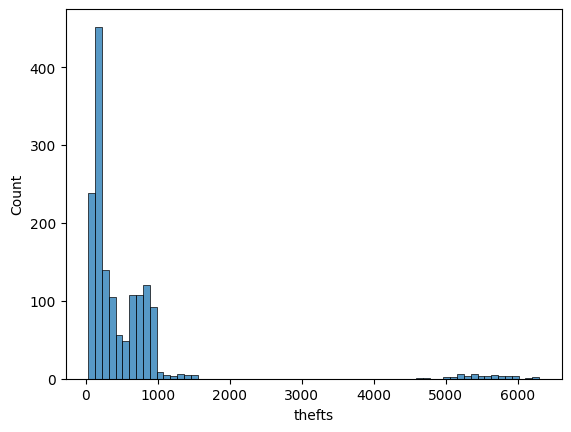

In [75]:
crimes_df = pd.read_csv('/Users/vinggio/pr/workers/MachineLearning/test_ML/Files/crimes_by_state.csv')
crimes_df['created_on'] = pd.to_datetime(crimes_df['datetime'], errors='coerce')
crimes_df.drop(columns=['datetime'], inplace=True)

sns.histplot(data=crimes_df, x="thefts")

## Outcomes
TODO: From the big df, obtain another that contains only the important values i.e state1 = avg selling price 


In [76]:
# data = pd.pivot_table(crimes_df, values='thefts', index=['state'], aggfunc=np.sum)
crimes_by_state = crimes_df.groupby('state')['thefts'].agg(['mean'])

crimes_by_state.reset_index(inplace=True)


In [77]:
crimes_by_state

,state,mean
0,aguascalientes,5510.625000
1,baja california,693.041667
2,baja california sur,421.145833
3,campeche,782.833333
4,chiapas,70.145833
5,chihuahua,694.270833
6,ciudad de mexico,322.055556
7,coahuila,174.541667
8,colima,217.138889
9,durango,690.854167


In [97]:
# plt.plot_date(prop_sell_df['created_on'], prop_sell_df['price_aprox_local_currency'], linestyle='solid')
mean_property_value_by_date = prop_sell_df.groupby(['created_on'])['price_aprox_local_currency'].mean().reset_index()
mean_property_value_by_date.set_index('created_on', inplace=True)
mean_property_value_by_date = mean_property_value_by_date[mean_property_value_by_date['created_on'] > "2015-01-01"]

mean_property_value_by_month = mean_property_value_by_date.resample('M')['property_value'].mean().reset_index()



# Plotting
plt.figure(figsize=(15,6))
plt.plot(mean_property_value_by_month['created_on'], mean_property_value_by_month['price_aprox_local_currency'], marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Property Value')
plt.title('Change in Mean Property Value by Date')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'created_on'

In [90]:


price_by_state = prop_sell_df.groupby('state')['price_aprox_local_currency'].agg(['mean'])
# price_by_state['range'] = prop_sell_df.groupby('state')['price_aprox_usd'].apply(lambda x: x.max() - x.min())

price_by_state.reset_index(inplace=True)
price_by_state

<bound method NDFrame.describe of 0        2013-09-01
1        2013-09-01
2        2013-09-01
3        2013-09-01
4        2013-09-01
            ...    
150923   2016-10-01
150924   2016-10-01
150925   2016-10-01
150926   2016-11-01
150927   2016-11-01
Name: date, Length: 150928, dtype: datetime64[ns]>


,state,mean
0,Aguascalientes,2.017044e+06
1,Baja California,1.886542e+06
2,Baja California Sur,4.687950e+06
3,Campeche,2.886515e+06
4,Chiapas,2.223186e+06
5,Chihuahua,2.725647e+06
6,Coahuila de Zaragoza,1.579580e+06
7,Colima,1.933933e+06
8,Distrito Federal,5.288377e+06
9,Durango,1.600049e+06


In [79]:
import unidecode
def process_str(s):
    if isinstance(s, str):
        return unidecode.unidecode(s).lower()
    return s  # Return as is if not a string


combined = pd.DataFrame()

crimes_by_state['state'] = crimes_by_state['state'].apply(process_str)
price_by_state['state'] = price_by_state['state'].apply(process_str)

price_by_state.replace("veracruz de ignacio de la llave", "veracruz", inplace=True)
price_by_state.replace("coahuila de zaragoza", "coahuila", inplace=True)
price_by_state.replace("distrito federal", "ciudad de mexico", inplace=True)
price_by_state.replace("michoacan de ocampo", "michoacan", inplace=True)

combined = pd.merge(crimes_by_state, price_by_state, on='state', how='left')

# drop row with florida in colum state
combined = combined[(combined['state'] != 'mexico') & (combined['state'] != 'florida') & (combined['state'] != 'aguascalientes')]

combined.rename(columns={'mean_x': "mean_thefts", "mean_y": "mean_house_price"}, inplace=True)
combined

,state,mean_thefts,mean_house_price
1,baja california,693.041667,1.886542e+06
2,baja california sur,421.145833,4.687950e+06
3,campeche,782.833333,2.886515e+06
4,chiapas,70.145833,2.223186e+06
5,chihuahua,694.270833,2.725647e+06
6,ciudad de mexico,322.055556,5.288377e+06
7,coahuila,174.541667,1.579580e+06
8,colima,217.138889,1.933933e+06
9,durango,690.854167,1.600049e+06
10,estado de mexico,722.979167,4.196474e+06


<Axes: xlabel='mean_house_price', ylabel='mean_thefts'>

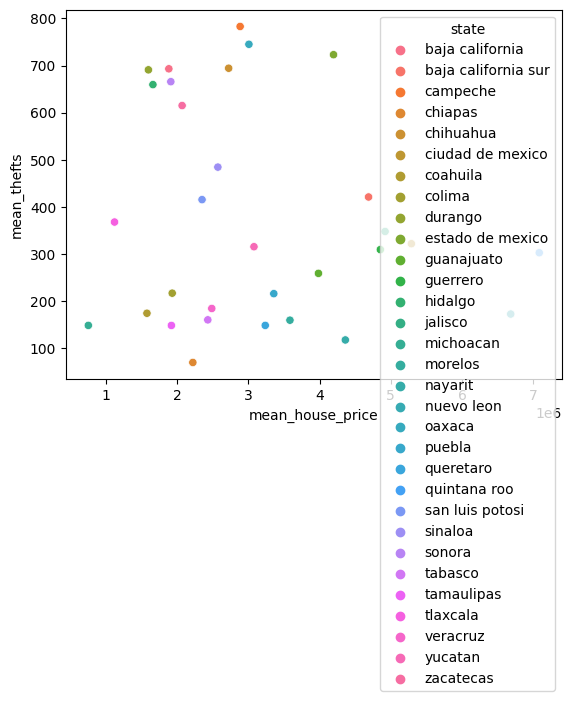

In [80]:
sns.scatterplot(data=combined,y="mean_thefts", x="mean_house_price", hue='state')